In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

Round 03

Documentação do crosstab: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [2]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [3]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [4]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'],  normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [5]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Para esse tipo de gráfico é mais ideal um scatterplot

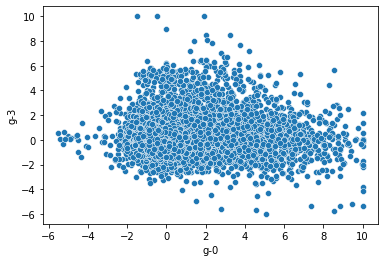

In [6]:
sns.scatterplot(x='g-0', y='g-3', data=dados)

In [7]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


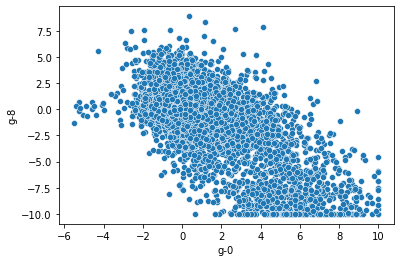

In [8]:
sns.scatterplot(x='g-0', y='g-8', data=dados)

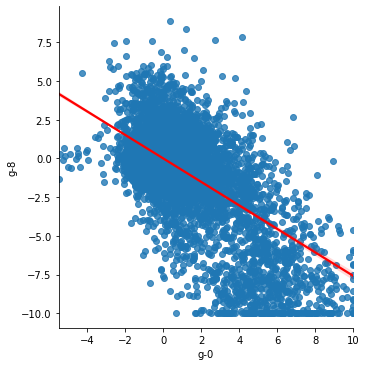

In [9]:
sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color': 'red'})

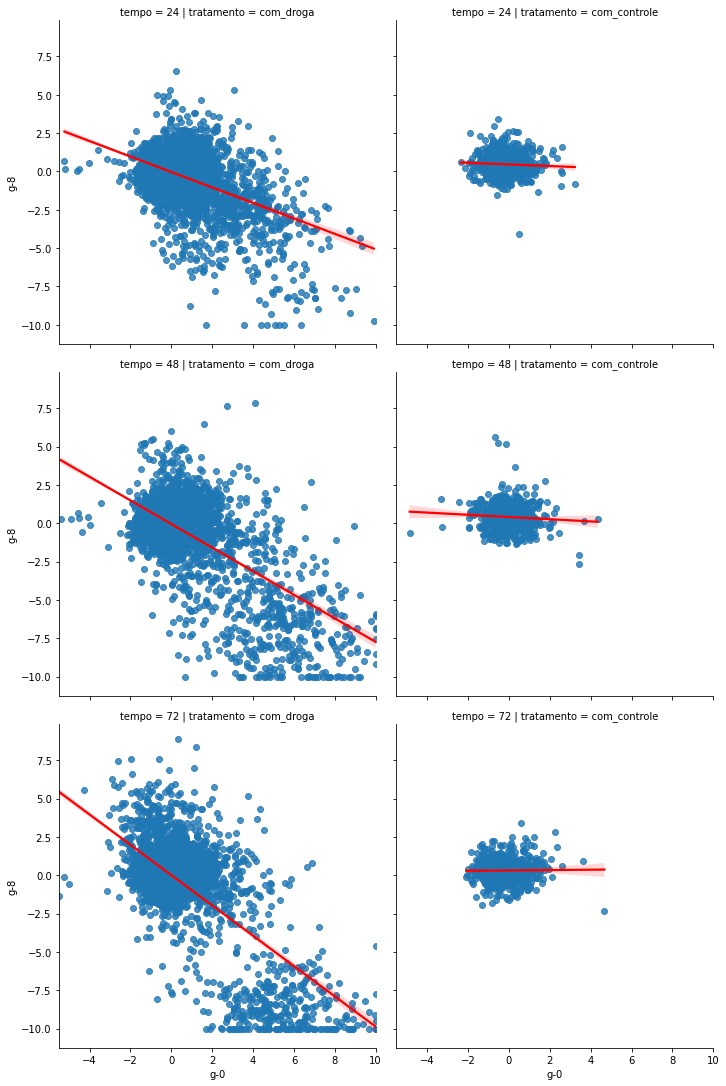

In [10]:
sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color': 'red'}, col='tratamento', row="tempo")

Uma outra forma de vermos tendências nos nossos dados é utilizando o método corr()

In [11]:
dados.loc[ : , 'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

In [13]:
corr = dados.loc[ : , 'g-0':'g-50'].corr()

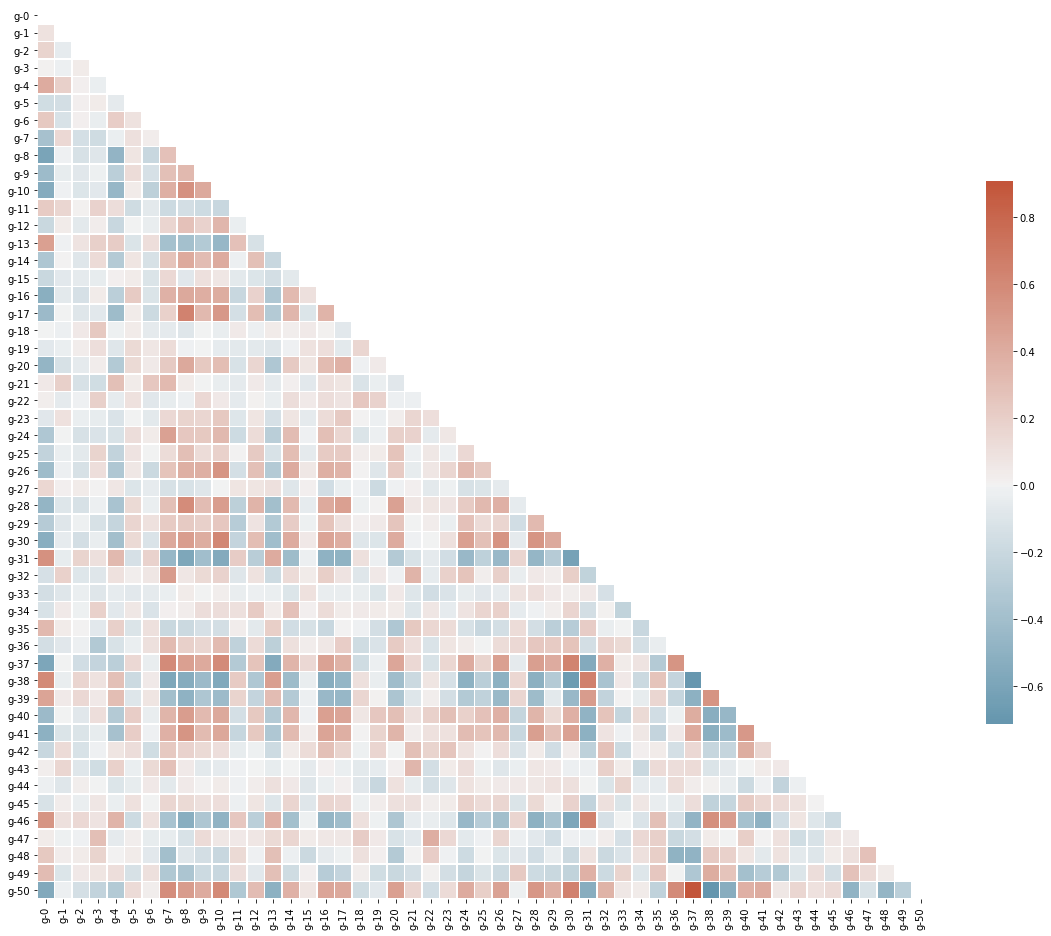

In [14]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
corr = dados.loc[ : , 'c-0':'c-50'].corr()

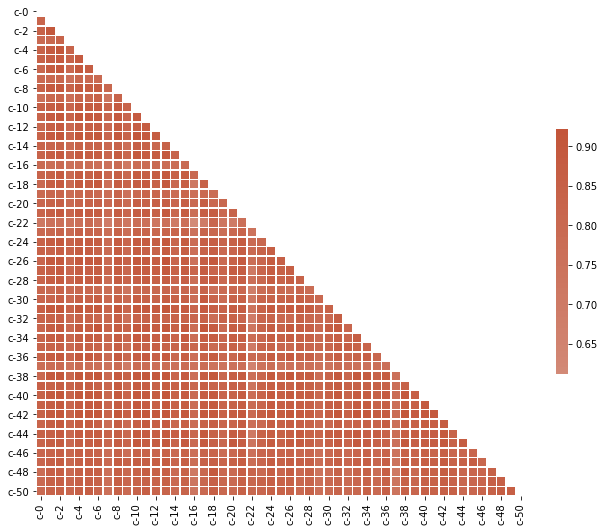

In [16]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Desafios Aula 03

## Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [17]:
dados.groupby(['dose', 'tempo']).size()

dose  tempo
D1    24       3886
      48       4354
      72       3907
D2    24       3886
      48       3896
      72       3885
dtype: int64

In [18]:
dados.groupby(['dose', 'tempo']).size().unstack(1)

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


## Desafio 02: Normalizar o crosstab pela coluna

In [19]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 03: Explorar outros agregadores

In [20]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [21]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [22]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [23]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

## Desafio 04: Explorar o Melt

Documentação do melt: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [24]:
dados.melt

<bound method DataFrame.melt of                  id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5

In [25]:
dados.melt(id_vars='tratamento')

,tratamento,variable,value
0,com_droga,id,id_000644bb2
1,com_droga,id,id_000779bfc
2,com_droga,id,id_000a6266a
3,com_droga,id,id_0015fd391
4,com_droga,id,id_001626bd3
...,...,...,...
20861059,com_droga,c-99,0.468
20861060,com_droga,c-99,0.3689
20861061,com_controle,c-99,0.3808
20861062,com_droga,c-99,0.074


In [26]:
dados.melt(id_vars='tratamento', value_vars='tempo')

,tratamento,variable,value
0,com_droga,tempo,24
1,com_droga,tempo,72
2,com_droga,tempo,48
3,com_droga,tempo,48
4,com_droga,tempo,72
...,...,...,...
23809,com_droga,tempo,24
23810,com_droga,tempo,24
23811,com_controle,tempo,48
23812,com_droga,tempo,24


In [27]:
dados.melt(id_vars='tratamento', value_vars='tempo', var_name='tempo')

,tratamento,tempo,value
0,com_droga,tempo,24
1,com_droga,tempo,72
2,com_droga,tempo,48
3,com_droga,tempo,48
4,com_droga,tempo,72
...,...,...,...
23809,com_droga,tempo,24
23810,com_droga,tempo,24
23811,com_controle,tempo,48
23812,com_droga,tempo,24


In [28]:
dados.melt(id_vars='tratamento', value_vars='tempo', var_name='tempo', value_name='em hrs')

,tratamento,tempo,em hrs
0,com_droga,tempo,24
1,com_droga,tempo,72
2,com_droga,tempo,48
3,com_droga,tempo,48
4,com_droga,tempo,72
...,...,...,...
23809,com_droga,tempo,24
23810,com_droga,tempo,24
23811,com_controle,tempo,48
23812,com_droga,tempo,24


##Desafio 05: Calcular e analisar a correlação entre os gs e cs. Refletir sobre os efeitos biológicos

In [29]:
dados_controle = dados[dados['droga'] == 'cacb2b860']
dados_controle['tratamento'].unique()

array(['com_controle'], dtype=object)

In [30]:
g_filtrado = dados[dados['droga'] == 'cacb2b860'].loc[:,'g-0':'g-30']
c_filtrado = dados[dados['droga'] == 'cacb2b860'].loc[:,'c-0':'c-30']
concatenado = pd.concat([g_filtrado, c_filtrado], axis = 1)
concatenado

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30
25,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,0.4665,0.2532,0.7212,-0.4467,0.7621,0.2687,-0.1338,0.6366,0.6220,-0.3014,0.7567,1.2480,0.6420,1.5370,0.8386,0.8053,0.1935,1.3500,0.4042,1.5230,0.0741,0.2019,0.3635,0.3103,0.8123,0.4770,0.4972,0.4685,0.4348,0.5421,0.4056
38,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,0.1431,-0.1254,-0.0740,0.0288,-0.7198,-1.0040,0.3443,-0.6593,0.1020,-0.1742,0.0873,0.0208,0.1540,-0.6229,-0.3923,0.0964,-1.0500,0.9068,-0.0658,-0.1852,0.0576,0.5113,-0.3795,0.1957,-0.3674,0.1904,-0.1540,0.4123,-0.8581,-0.2263,0.7330
40,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,0.8107,0.7110,-0.0797,0.1703,1.7100,-0.0436,-0.2968,0.8906,-0.5218,1.2530,0.8287,0.9787,1.1110,-0.2813,0.3524,0.6322,1.4640,0.4940,0.4516,1.0320,0.8206,-0.0691,1.0970,0.2771,0.4753,0.2259,1.0160,0.4358,0.0752,0.9084,0.7651
47,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,-0.6666,0.3619,-0.4816,0.3545,0.0480,-0.1306,0.3623,-1.4190,0.1975,-0.2137,-0.3358,-0.9395,-0.1191,0.5055,-0.2079,0.1760,-0.5248,0.0266,-0.1298,-0.5139,-0.4645,-0.5434,-0.7326,-0.3624,-0.1764,-0.4371,-0.6318,0.5859,0.9494,-0.7306,0.2834
63,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.8432,0.4478,-0.8843,-0.6954,0.4762,0.9160,0.1785,0.2807,1.3500,0.1766,-0.1137,1.4910,-0.6229,-0.9833,-0.1895,0.5661,0.6124,-0.1581,0.3927,0.8244,0.5313,0.4941,-0.6869,0.0460,0.4194,0.5550,1.1300,-0.2166,0.6102,0.3593,-0.4806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0.0938,-0.6062,0.6108,-0.4900,0.1075,0.3029,-0.1369,0.6950,0.2731,0.6061,0.2976,0.3948,0.8336,1.1720,0.0790,0.3028,-0.0120,0.0781,0.2334,0.1682,0.3971,0.6605,-0.6505,-0.1283,-0.4924,0.1668,1.2440,-1.6380,0.5628,0.9434,0.9574,0.0359,1.1500,0.8947,-0.9647,-0.6059,0.4703,-0.1513
23747,-0.6204,-1.3800,-1.1880,-0.6573,-0.8408,-0.2447,1.3490,-0.5155,1.2610,-0.1790,-0.7182,-0.7885,0.3022,2.0140,0.1667,-0.7325,-0.1553,0.8400,-0.1069,-0.7247,1.3430,1.5010,-1.3370,0.7190,-0.0843,0.4841,-0.9104,1.3990,0.7447,-1.2110,0.6562,1.6290,-0.2854,0.2248,-1.4850,0.9749,0.6954,0.9388,0.0511,0.2647,1.0440,0.7449,1.0390,-0.1519,0.6743,1.3460,0.1894,0.7540,0.9674,0.6959,0.2556,1.5190,0.9388,-0.9945,-0.1075,0.9664,0.9317,0.4137,1.3970,-0.5932,0.1369,0.4803
23768,-0.1051,0.4335,0.3648,-0.0525,-0.3632,-0.3228,-2.3190,-0.5294,0.1878,0.5047,1.3820,0.6107,2.4790,0.4347,0.9422,-0.1042,-0.2611,1.5760,-0.0232,-0.2455,0.8058,-2.4180,-0.5838,-0.1626,-0.8609,-0.2021,0.1494,0

In [32]:
concat_corr = concatenado.corr()


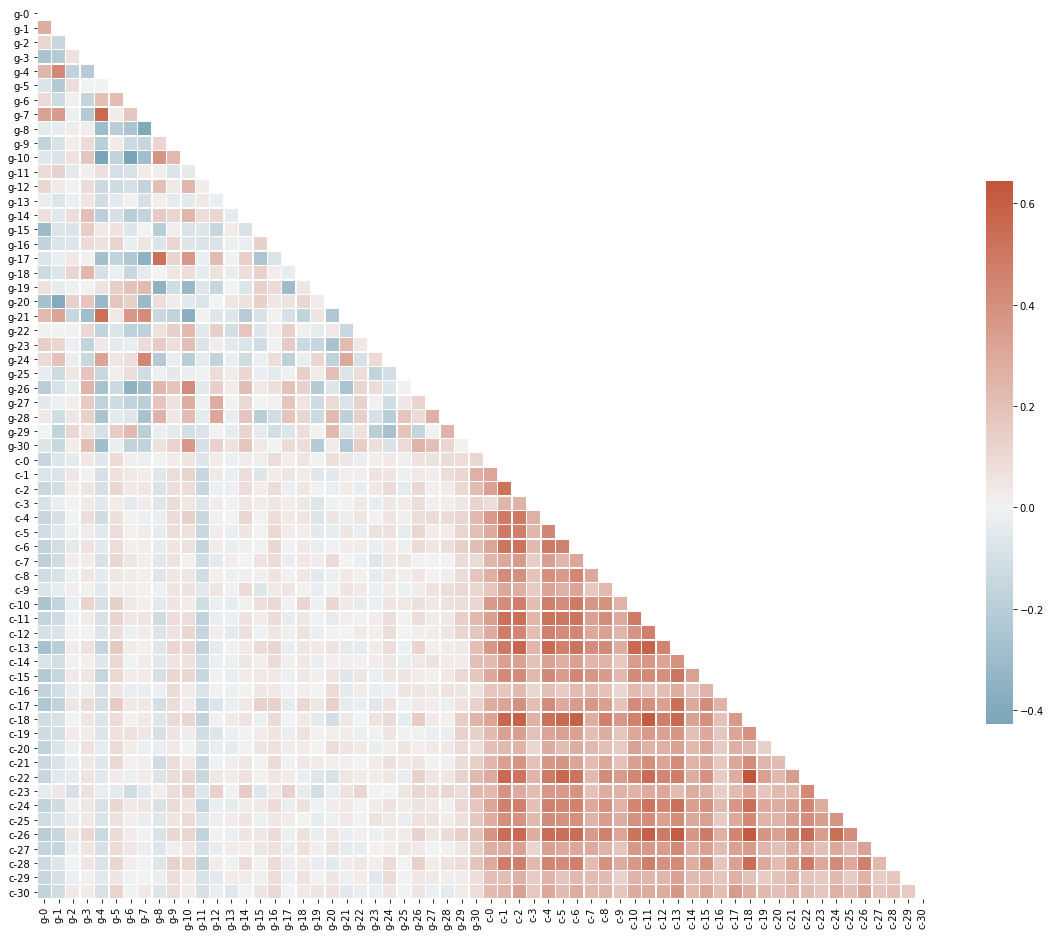

In [33]:
mask = np.triu(np.ones_like(concat_corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(concat_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5})

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

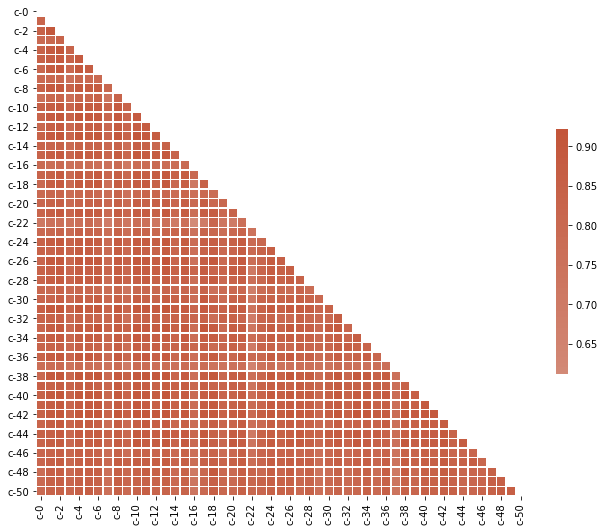

In [34]:
corr = dados.loc[ : , 'c-0':'c-50'].corr()

# np.triu = valores de cima do triangulo
# Os valores onde a mascara vale não sao mostrados, valores nulos já fazem parte da mascara automaticamente.

mask = np.triu(np.ones_like(corr, dtype=bool))

# Seta a figura
f, ax = plt.subplots(figsize=(11, 9))

# Seta o mapa de cres
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# corr -> correlação 
# mask ->  mascara
# center -> onde fica o centro do mapa de calor
# square -> o formato dos pedaços do mapa
# linewidth -> o tamanho das linhas
# cbar_kws -> valores mandados pra outra camada do grafico feita pelo figure do matplotlib, no caso shrink seria pro tamanho do mapa de cores